In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv("C:/Users/dasar/OneDrive/Desktop/heart.csv")

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
df.shape

(303, 14)

In [51]:
df['target'].unique()

array([1, 0], dtype=int64)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot: xlabel='target', ylabel='count'>

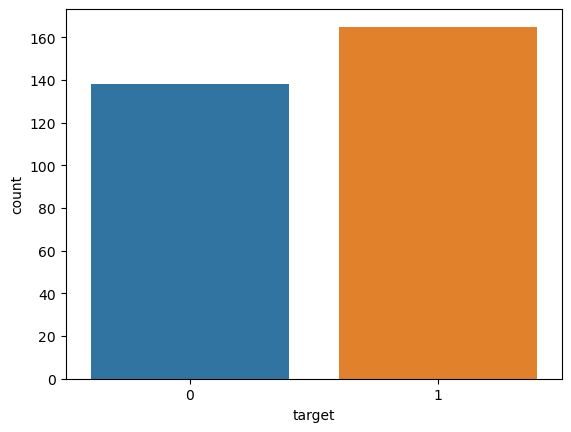

In [55]:
sns.countplot(x='target',data=df)

In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

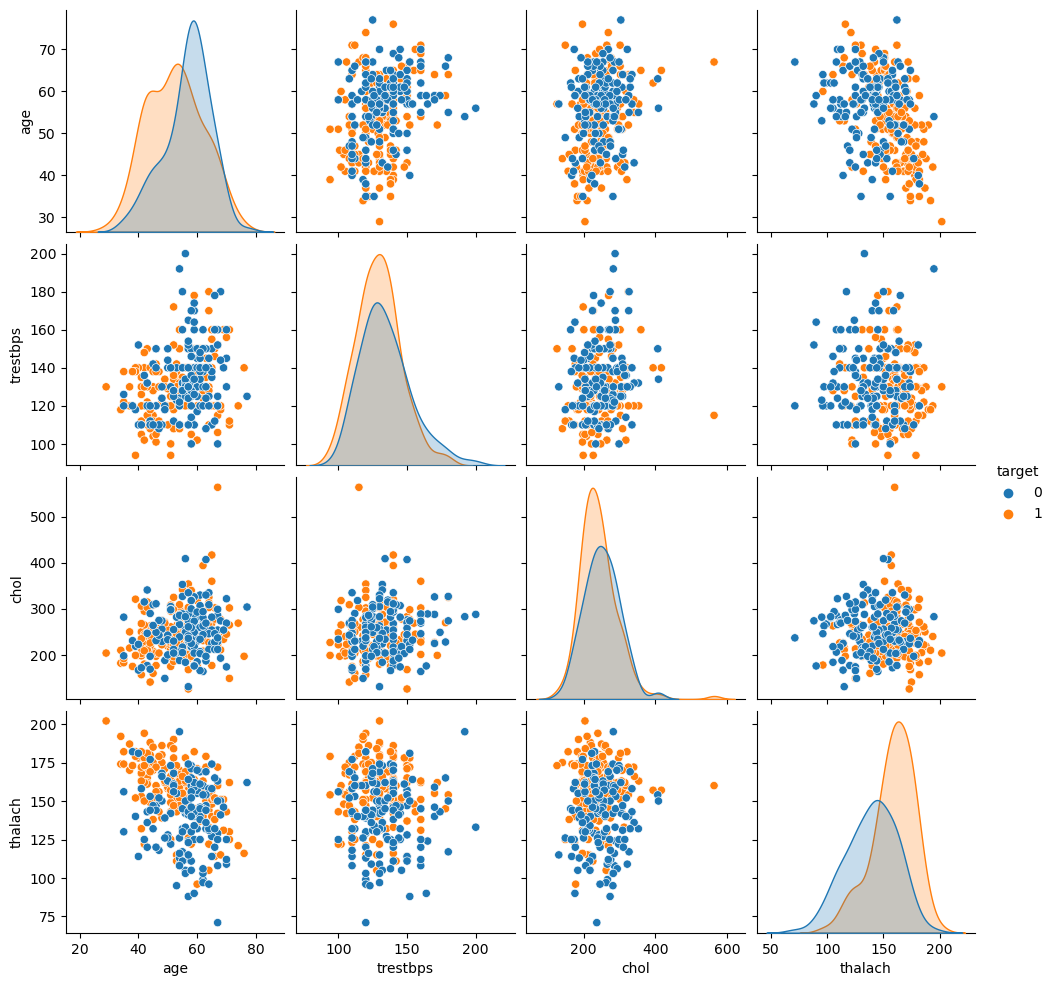

In [57]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<AxesSubplot: >

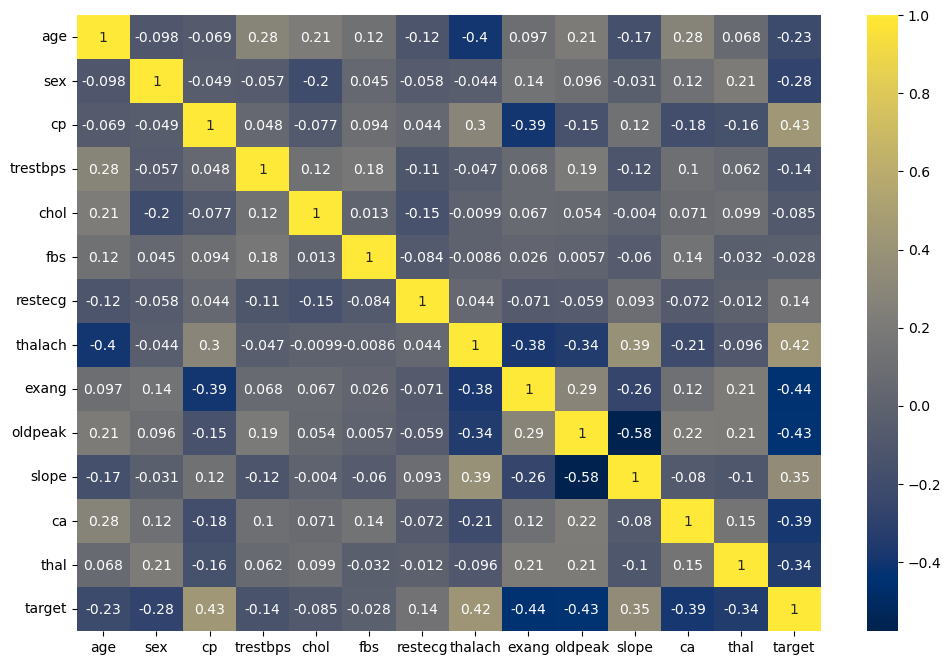

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='cividis',annot=True)

In [59]:
X = df.drop('target',axis=1)
y = df['target']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [62]:
scaler = StandardScaler()

In [63]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_model = LogisticRegression()

In [66]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred = log_model.predict(X_test)


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  3]
 [ 2 14]]


0.8387096774193549

In [69]:
log_model.coef_

array([[ 0.0091362 , -1.23373248,  0.87985602, -0.01125369, -0.0028767 ,
        -0.01682414,  0.33713007,  0.02706563, -0.73268462, -0.47826867,
         0.56184451, -0.80214915, -0.8741277 ]])

In [70]:
from sklearn.metrics import classification_report

In [71]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.80      0.83        15\n           1       0.82      0.88      0.85        16\n\n    accuracy                           0.84        31\n   macro avg       0.84      0.84      0.84        31\nweighted avg       0.84      0.84      0.84        31\n'